In [1]:
from math import factorial
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.ensemble import RandomForestRegressor


Reading both data sets

In [3]:
sale = pd.read_csv('sales.csv')
market= pd.read_csv('market.csv')

overview of the sales data set


In [4]:
sale.head()

,market_id,date,is_open,sales_amount,
0,XC14,31/12/2022,YES,55727.34,NaN
1,WG25,31/12/2022,YES,12984.10,NaN
2,UX72,31/12/2022,YES,13046.56,NaN
3,EE84,31/12/2022,YES,60916.76,NaN
4,RF54,31/12/2022,YES,12376.42,NaN


## Description of the dataset


This data set provides a Sales of market information, such as dates, amounts sold, open status, and unique IDs.

### Table

1. **Market IDs (market_id):** - A market ID is a unique number assigned to each market.
   - In a data set, Market ID helps to distinguish one market from another.

2. **Date:** - The date corresponding to the recorded data is shown in this column. Date indicates when the sales transaction or data collection occurred.

Third, **Is Open (is_open):** - This column indicates whether any market was open or closed on a given date.
   - The market was opened on that particular day, according to the "YES" price.

4. **Sales_amount:** - This column contains information about the sales volume in each market on the specified date.
   - This shows the total amount generated by each market on the specified date.

5. **NaN (Not-a-Number):** - A "NaN" value in a data set usually indicates unrecorded or missing data.
   - This means that there may be more data or information that is now missing but should have been captured.

In conclusion, the dataset provides information about markets, such as their unique identity (Market IDs), whether they were open on a given day (Is Open), and the total amount of cash generated that day (Sales Amount); . . . . A "NaN" number indicates that there is no data requiring further checking or that the data must be completed.

In [5]:
market.head()

,id,country,Unnamed: 2,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,SPAIN,NaN,HYPER,11135,773.0,515,YES
1,WG25,FRANCE,NaN,MINI,1402,252.0,522,YES
2,UX72,FRANCE,NaN,MINI,1452,265.0,15939,YES
3,EE84,SPAIN,NaN,HYPER,15259,874.0,754,YES
4,RF54,FRANCE,NaN,MINI,2497,191.0,34007,YES


## Dataset Explanation

This dataset contains information about different markets, including their unique identifiers, country, market type, square footage, average number of customers, competitor distance, and promotions status.

### Columns

1. **ID (id):**
   - Each market is assigned a unique identifier, known as the ID.
   - The ID helps distinguish one market from another in the dataset.

2. **Country (country):**
   - This column represents the country in which each market is located.
   - It specifies the geographical location of each market.

3. **Unnamed: 2:**
   - The purpose of this column is unclear as it is labeled as "Unnamed: 2."
   - Further investigation may be needed to determine the significance of this column.

4. **Market Type (market_type):**
   - This column provides information about the type of market (super, HYPER, MINI) to which each entry belongs.
   - It categorizes the markets based on their types.

5. **Square Feet (square_feet):**
   - This column contains data related to the square footage of each market.
   - It represents the physical size or area of each market location.

6. **Average Customers (avg_customers):**
   - This column provides information about the average number of customers visiting each market.
   - It indicates the typical customer traffic at each market.

7. **Competitor Distance (competitor_distance):**
   - This column contains data related to the distance between each market and its competitors.
   - It measures the proximity of each market to its competing businesses.

8. **Has Promotions (has_promotions):**
   - This column indicates whether each market has promotions or not.
   - It categorizes the markets as having promotions with a "YES" value or not having promotions.

The dataset provides details about different markets, including their unique identifiers (ID), country locations, market types, physical sizes (Square Feet), average customer traffic (Average Customers), distances to competitors (Competitor Distance), and promotions status (Has Promotions). The "Unnamed: 2" column appears to be an additional column with unclear purpose and may require further investigation for its significance.


shape of the sale data

In [6]:

sale.shape

(523949, 5)

The data set has 523949 observations and 5 attributes

checking nan vaules in data

In [7]:

sale.isna().sum()

market_id            1
date                 1
is_open              1
sales_amount        15
                523949
dtype: int64

There is one missing value in market_id,date,is_open and 15 are in sales and one attribute is completely contained missing value

we need to drop completely missing attribute

In [8]:
sale = sale.drop(sale.columns[-1], axis=1)

so we need also to drop missing value in sale

In [9]:
sale = sale.dropna()

now again we need to check the shape of sale data

In [10]:
sale.shape

(523934, 4)

after droping missing values from the data set we have left with 523934 oberservations and 4 attributes

**An important step** is that we need to verify that there are no negative values in *sales_amount* because *sales_amount* can never be *negative*

In [11]:
sale[sale['sales_amount'] < 0]


,market_id,date,is_open,sales_amount
47528,XC14,16/10/2022,YES,-999999.0
48150,XC14,15/10/2022,YES,-999999.0
48772,XC14,14/10/2022,YES,-999999.0
49394,XC14,13/10/2022,YES,-999999.0
50016,XC14,12/10/2022,YES,-999999.0
50638,XC14,11/10/2022,YES,-999999.0


so there are some*negative values* in the *sales_amount attribute* so we need to change it in plus as it can be human error while entrying the data

In [12]:
sale['sales_amount'].replace(-999999.0,999999.0, inplace=True)

Now we need to *deselect* the values which are *negative*

In [13]:
sale_df = sale[sale['sales_amount'] >= 0]

In [14]:
sale_df.head()

,market_id,date,is_open,sales_amount
0,XC14,31/12/2022,YES,55727.34
1,WG25,31/12/2022,YES,12984.10
2,UX72,31/12/2022,YES,13046.56
3,EE84,31/12/2022,YES,60916.76
4,RF54,31/12/2022,YES,12376.42


Here we have the data which has no missing or negative values so we can proceed to explore the ditribution of data

(array([5.23933e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([      0. ,  999999.9, 1999999.8, 2999999.7, 3999999.6, 4999999.5,
        5999999.4, 6999999.3, 7999999.2, 8999999.1, 9999999. ]),
 <BarContainer object of 10 artists>)

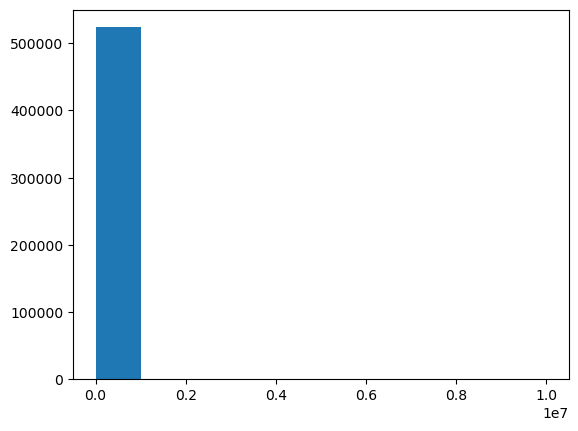

In [15]:
# now let's study the distribution of numerical predictor in the data 
import matplotlib.pyplot as plt
plt.hist(sale_df['sales_amount'])

The histogram of the sales_amount not plotted correctly. we need to correct this data in order to get the correct distribution of attribute

There are some **outliers** in the data set that the reason that the **distribution of the data set is not correct**

**The one method to get right distribution of data is to select 95% percentile of the data set**

In [16]:

percentile_95 = np.percentile(sale_df['sales_amount'], 95)
filtered_data_sale = sale_df[sale_df['sales_amount'] <= percentile_95]
filtered_sales =filtered_data_sale


after selecting **95% of percentile** of the data we again need to check for **nan values**

In [17]:
filtered_sales.isna().sum()

market_id       0
date            0
is_open         0
sales_amount    0
dtype: int64

(array([ 88623., 124300., 115475.,  41685.,  99968.,      0.,      0.,
             0.,   4673.,  23013.]),
 array([    0.   ,  6036.088, 12072.176, 18108.264, 24144.352, 30180.44 ,
        36216.528, 42252.616, 48288.704, 54324.792, 60360.88 ]),
 <BarContainer object of 10 artists>)

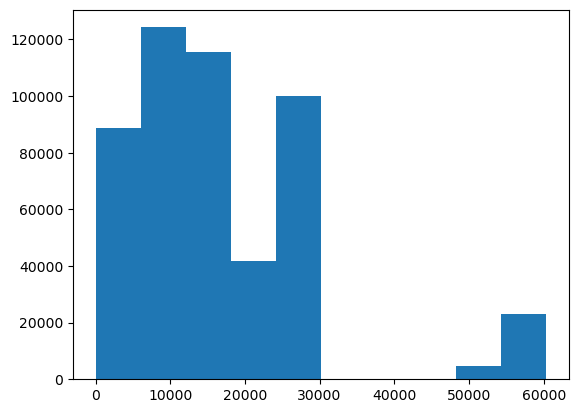

In [18]:
plt.hist(filtered_sales['sales_amount'])

as we took **95 percentile** of the data now we got the distribtion of data
here we can see there is **huge sales** from around 9999 to 12000 and then **median sales** from 20000 to 30000 and **lastly very low sales** from 52000 to 67000

we need to check whole the attribute values of **is_open that** it only contain categorial variables **Yes Or NO** 


In [19]:
filtered_sales['is_open'].unique()

array(['YES', 'NO', 'YESS'], dtype=object)

So there is wrong entry with mis spelled in the data **YESS** we need to correct it 

In [20]:
filtered_sales['is_open'].replace('YESS', 'YES', inplace=True)
filtered_sales['is_open'].unique()

C:\Users\UmairChohan\AppData\Local\Temp\ipykernel_18136\3209735323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sales['is_open'].replace('YESS', 'YES', inplace=True)


array(['YES', 'NO'], dtype=object)

**The distribution of is_open attribute**

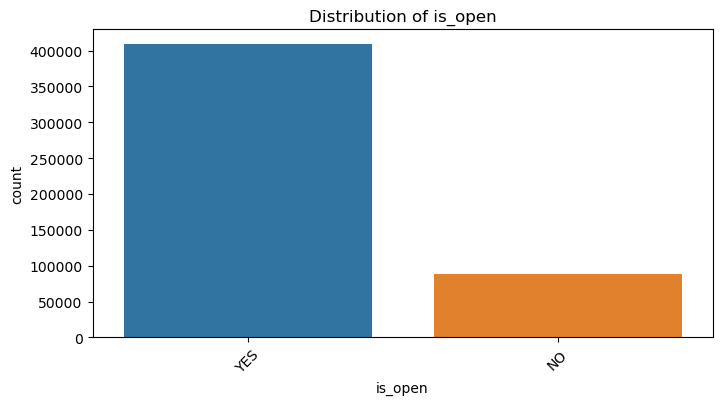

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_columns = ['is_open']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=filtered_sales, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Distribution of is_open

The distribution of the binary variable is_open over a dataset is shown in the bar chart. The number of records is represented by the y-axis, while the two categories on the x-axis denote whether a condition is true or false.

The count for each category is as follows:

- **Yes**: With a bar over 400,000, the 'Yes' category has a much larger count. This implies that the majority of the dataset's records satisfy the evaluation's requirement.
- **No**: The 'No' category, on the other hand, has a bar that is slightly less than 100,000. This suggests that a reduced percentage of the records do not satisfy the requirement.


## Explanation

The significant variation in bar heights suggests that the dataset's majority value for the condition denoted by is_open is 'Yes'. It could be inferred that a significant proportion of organisations, such as firms or facilities, are now functioning if {is_open} indicates their operational state.



## Now let's study the  market data

In [22]:
market.shape

(750, 8)

market data have **750 observations** and **7 atrributes** of market data

checking **missing values** in market data se

In [23]:
# checking nan values from data
market.isna().sum()

id                       0
country                  0
Unnamed: 2             750
market_type              2
square_feet              0
avg_customers            1
competitor_distance      0
has_promotions           0
dtype: int64

so there is on **column** which is complete missing from the data set we need to remove it from the data. and **market_type** has 2 missing values and **avg_customer** has on missing values. 

In [24]:
market = market.drop(columns=['Unnamed: 2'], axis=1)


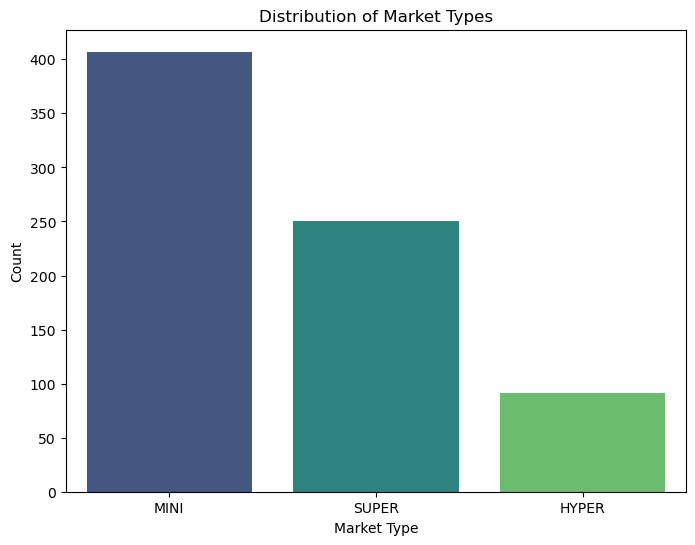

In [25]:
value_counts_market_type = market['market_type'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts_market_type.index, y=value_counts_market_type.values, palette="viridis")
plt.xlabel('Market Type')
plt.ylabel('Count')
plt.title('Distribution of Market Types')
plt.show()

# Market Type Distribution

The frequency of various market kinds within a dataset is represented visually by a bar chart. The three market categories—MINI, SUPER, and HYPER—are represented by the x-axis, while the y-axis's 'Count' shows how many instances of each market type there are.


We can see the following counts for each market type on the chart:

- **MINI**: The market category that is most common, with a count higher than 400. The fact that this group predominates the dataset suggests that MINI markets are significantly preferred or exist.
- **SUPER**: With a figure of about 250, the second most prevalent market category. SUPER markets are quite common, however not as much as MINI markets.



**HYPER**: With a count close to 100, this is the least common of the three. This implies that, in comparison to MINI and SUPER marketplaces, HYPER markets are substantially less common.
## Explanation
The distribution points to a market environment in which MINI markets are the most common, SUPER markets are moderately prevalent, and HYPER markets are very uncommon. This may be a result of smaller-scale operations being preferred by company plans, logistical considerations, or consumer behaviour.
## Visual Evaluation
To improve readability, the bar chart employs different colours to indicate the different market types:
- A dark blue bar symbolises the MINI market, signifying its supremacy.
- The SUPER market is easily distinguished from the MINI market thanks to its teal appearance.
- The HYPER market is distinguished from the other two groups by being represented in a lighter shade of green.
Darker hues indicate higher frequencies, thus the colour scheme not only aids in category separation but also quietly reflects the hierarchy in the counts.





























In [26]:
market['market_type'].dropna(inplace=True)

here we droped missing values from the attribute market_type

In [27]:
df= market

here we need to make sure that the **avg_customers** attribute values **can not be negative** so we need to filter postive values from data

In [28]:
df = df[df['avg_customers'] >= 0]


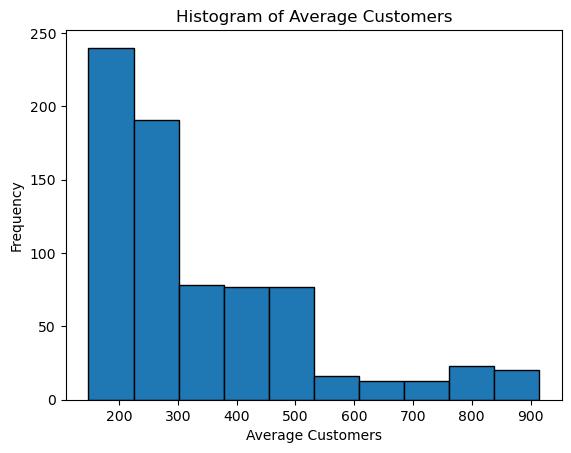

In [29]:
# Create a histogram
plt.hist(df['avg_customers'], bins=10, edgecolor='black')
plt.xlabel('Average Customers')
plt.ylabel('Frequency')
plt.title('Histogram of Average Customers')
plt.show()

# Average Customer Histogram

The distribution of average customers is shown in the histogram above, where the y-axis indicates the number of occurrences within the dataset and the x-axis shows the range of average customers.

## Distribution Specifics:

- With more than 200 instances, the first bin, which includes the range up to 200 average consumers, has the highest frequency.
- The frequency distribution exhibits a right-skewed pattern as the average client base grows.
- There are more than 150 instances in the bin for the 200–300 average clients.
- As we move to larger bins of average consumers (300-400, 400-500), each with a frequency slightly above 100, there is a noticeable fall in frequency.
- The frequency significantly decreases for ranges exceeding 500 typical consumers, suggesting that these are fewer frequent cases in the dataset.

## Interpretation

According to the distribution, few entities (such as stores, branches, etc.) record larger average customer numbers than the bulk of entities, which appear to have relatively few average customers overall. This could point to a widespread pattern in which a small number of companies see high consumer turnout while the others see moderate to low attendance.

## Visual Evaluation:

The average frequency of consumers in each bin is shown by consistent blue bars in the histogram. The distribution is skewed, as seen by the bars' decreasing height from left to right, which highlights the greater number of businesses with lower average customers.



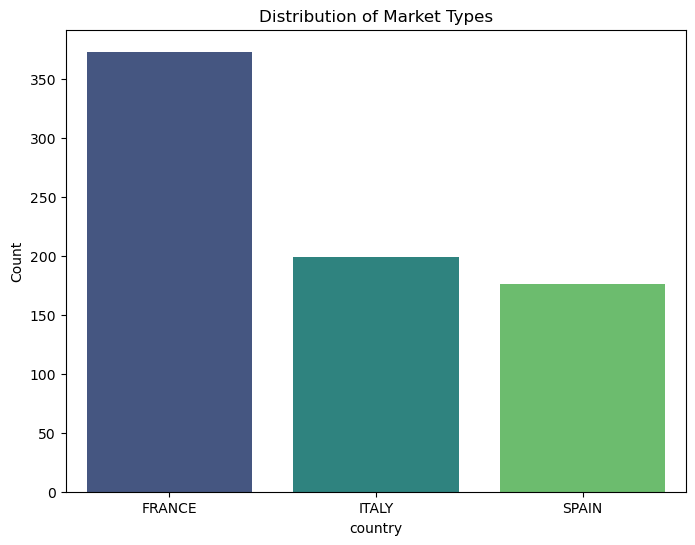

In [30]:
value_counts_market_type =df['country'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts_market_type.index, y=value_counts_market_type.values, palette="viridis")
plt.xlabel('country')
plt.ylabel('Count')
plt.title('Distribution of Market Types')
plt.show()

# Market Type Distribution by Country


The number of market kinds in three distinct European nations—France, Italy, and Spain—is depicted in the bar chart.

## Notations on the Chart:

- **France**: Shows the highest count, with the bar rising to just over 350, suggesting that there are a sizable number of market kinds in France.
- **Italy**: Bar is approximately 250, which indicates a moderate presence of market kinds; this is a smaller count than France.
- **Spain**: Displays a bar near 200, indicating a comparable but little lower market presence than Italy. The count is just marginally lower than Italy's.

# Market Type Distribution by Country


The number of market kinds in three distinct European nations—France, Italy, and Spain—is depicted in the bar chart.

## Notations on the Chart:

- **France**: Shows the highest count, with the bar rising to just over 350, suggesting that there are a sizable number of market kinds in France.
- **Italy**: Bar is approximately 250, which indicates a moderate presence of market kinds; this is a smaller count than France.
- **Spain**: Displays a bar near 200, indicating a comparable but little lower market presence than Italy. The count is just marginally lower than Italy's.


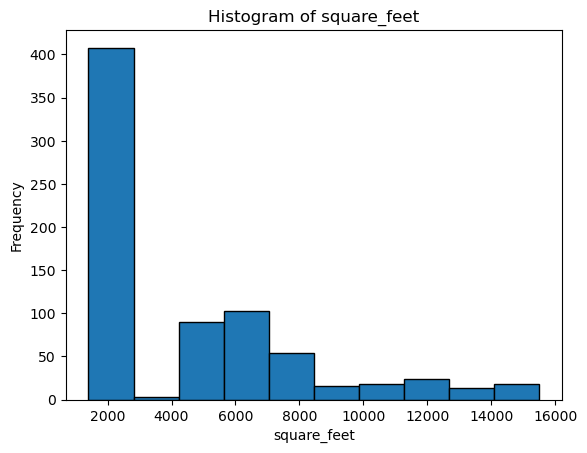

In [31]:
plt.hist(df['square_feet'], bins=10, edgecolor='black')
plt.xlabel('square_feet')
plt.ylabel('Frequency')
plt.title('Histogram of square_feet')
plt.show()

# Square Foot Histogram


The frequency distribution of square footage for a dataset is represented by a histogram. The y-axis shows the frequency of observations within the ranges that the x-axis is separated into bins that reflect ranges of square feet.

## Notations on the Chart:

- With a bar that approaches 400 occurrences, the first bin, which covers an area of up to 2000 square feet, has the highest frequency.
- The frequency of homes between 2000 and 4000 square feet is much lower, with only 150 occurrences in this range.
- As the square footage grows, the frequency decreases and fewer occurrences are shown in each successive bin (6000-8000, 6000-6000, etc.).
- The very low bars in those areas show how uncommon properties with square footage above 10,000 are in this dataset.

## Interpretation

The distribution's skewness implies that properties with lesser square footage make up the majority of the sample. Bigger properties are somewhat rarer, especially ones with square footage in the five digits.

## Visual Evaluation:

Every bar in the histogram is consistently blue, making it possible to see the frequency at each bin level with clarity. The bars' descending heights from left to right clearly highlight how frequency decreases as square footage grows.




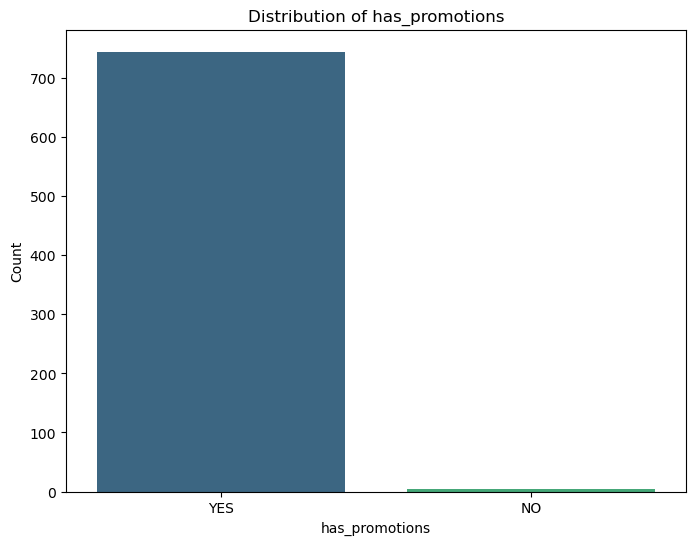

In [32]:
value_counts_market_type =df['has_promotions'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts_market_type.index, y=value_counts_market_type.values, palette="viridis")
plt.xlabel('has_promotions')
plt.ylabel('Count')
plt.title('Distribution of has_promotions')
plt.show()

# How has_promotions are distributed

The distribution of the binary variable has_promotions within a dataset is shown in the bar chart. The y-axis displays the number of occurrences for each category, while the x-axis divides the data into replies that are 'YES' and 'NO'.

## Notations on the Chart:

**YES**: The 'YES' category shows a count that is abnormally high, with the bar above 700, suggesting a high proportion of promotions.
**NO**: The bar for the 'NO' category is so low that it is hardly visible on the chart, and its count is nearly tiny in comparison to the 'YES' category.

## Interpretation

Given that the two bars' striking contrast indicates that the vast majority of the entries in the dataset have promotions, it is likely that promotions are a prevalent characteristic in the dataset.


## Visual Evaluation:

To emphasise the 'YES' category's dominance in the dataset, the bar is coloured a bright blue. The 'NO' category, on the other hand, is visually indicated by a narrow green line, which highlights how uncommon submissions without promotions are.

This unusual picture emphasises how common promotions are in the dataset under observation.



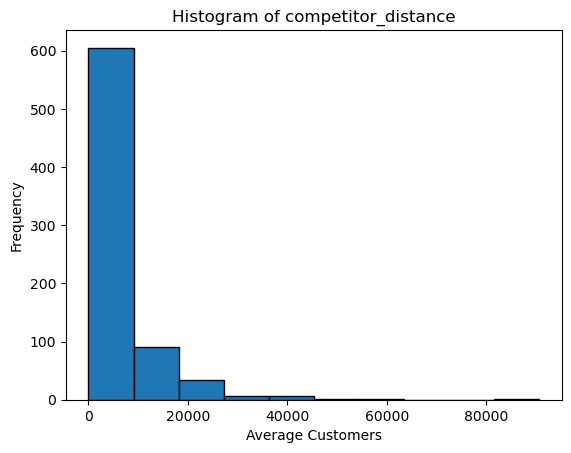

In [33]:
# Create a histogram
plt.hist(df['competitor_distance'], bins=10, edgecolor='black')
plt.xlabel('Average Customers')
plt.ylabel('Frequency')
plt.title('Histogram of competitor_distance')
plt.show()

# Competitor Distance Histogram

The frequency distribution of the distance to rivals over a set of data points is shown by this histogram. The y-axis shows the frequency of events within specific ranges, while the x-axis indicates the range of distances in metres to the closest rival.

## Notations on the Chart:

- With more than 600 occurrences, the first bin, which spans 0 to 20,000 metres, exhibits the highest frequency. This suggests that there are rivals for the majority of the data points within a 20,000-meter radius.
- At distances above 20,000 metres, the frequency sharply drops, reaching slightly over 100 metres in the 20,000–40,000 metre range.
- The frequency decreases significantly for distances greater than 40,000 metres, suggesting that relatively few creatures have rivals at these lengths.


## Interpretation

It appears that rivals are usually found close to one another based on the concentration of higher frequencies at lower distances. This can be a reflection of a cutthroat corporate climate where being close to rivals is the norm.

## Visual Evaluation:

The bars in the histogram are coloured in varying hues of blue, where the hue's strength reflects the frequency of occurrences. There are very few situations when the closest rival is farther away, as the sharp decline in bar height following the first bin graphically highlights.

The x-axis label appears to be mislabeled, with "Average Customers" mentioned rather than a suitable distance measurement. To correctly reflect the data shown in the histogram, this has to be adjusted.



# Merging Sales And Market Data

In [34]:
# Renaming the 'id' column in market_data to 'market_id' for a consistent merge
market_data_renamed = df.rename(columns={'id': 'market_id'})

# Merging the datasets on 'market_id'
merged_data = pd.merge(filtered_sales, market_data_renamed, on='market_id', how='left')


In [35]:
merged_data.head()

,market_id,date,is_open,sales_amount,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,31/12/2022,YES,55727.34,SPAIN,HYPER,11135.0,773.0,515.0,YES
1,WG25,31/12/2022,YES,12984.10,FRANCE,MINI,1402.0,252.0,522.0,YES
2,UX72,31/12/2022,YES,13046.56,FRANCE,MINI,1452.0,265.0,15939.0,YES
3,RF54,31/12/2022,YES,12376.42,FRANCE,MINI,2497.0,191.0,34007.0,YES
4,ZU61,31/12/2022,YES,12227.24,FRANCE,MINI,1507.0,162.0,247.0,YES


In [36]:
# shape of data set after merging
merged_data.shape

(497737, 10)

In [37]:
#again droping missing values from the merged data set
merged_data.dropna(inplace=True)

In [38]:
#checking missing values in each column
merged_data.isna().sum()

market_id              0
date                   0
is_open                0
sales_amount           0
country                0
market_type            0
square_feet            0
avg_customers          0
competitor_distance    0
has_promotions         0
dtype: int64

In [39]:
# let's check duplicate 
duplicates_specific = merged_data.duplicated(subset=['market_id', 'date']).any()
duplicates_specific

False

In [40]:
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['year'] = merged_data['date'].dt.year
merged_data['month'] = merged_data['date'].dt.month
merged_data['day'] = merged_data['date'].dt.day
# Additional components like day of week, quarter, etc., can also be extracted.


C:\Users\UmairChohan\AppData\Local\Temp\ipykernel_18136\1789057460.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_data['date'] = pd.to_datetime(merged_data['date'])


In [41]:
merged_data=merged_data.drop(columns=['date'], axis=1)

since the data attribute is not suitable to fit the linear regression we already split this data set into day month and year attribute so we can drop this column

In [42]:
# List of categorical columns to be one-hot encoded
categorical_cols = ['is_open', 'country', 'market_type', 'has_promotions']

# Applying one-hot encoding
merged_data_encoded = pd.get_dummies(merged_data, columns=categorical_cols)



catagorial varibale needed to be transformed to be fitted properly for regression model

In [43]:
merged_data_encoded.head()

,market_id,sales_amount,square_feet,avg_customers,competitor_distance,year,month,day,is_open_NO,is_open_YES,country_FRANCE,country_ITALY,country_SPAIN,market_type_HYPER,market_type_MINI,market_type_SUPER,has_promotions_NO,has_promotions_YES
0,XC14,55727.34,11135.0,773.0,515.0,2022,12,31,0,1,0,0,1,1,0,0,0,1
1,WG25,12984.10,1402.0,252.0,522.0,2022,12,31,0,1,1,0,0,0,1,0,0,1
2,UX72,13046.56,1452.0,265.0,15939.0,2022,12,31,0,1,1,0,0,0,1,0,0,1
3,RF54,12376.42,2497.0,191.0,34007.0,2022,12,31,0,1,1,0,0,0,1,0,0,1
4,ZU61,12227.24,1507.0,162.0,247.0,2022,12,31,0,1,1,0,0,0,1,0,0,1


C:\Users\UmairChohan\AppData\Local\Temp\ipykernel_18136\2613136063.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data_encoded.corr()


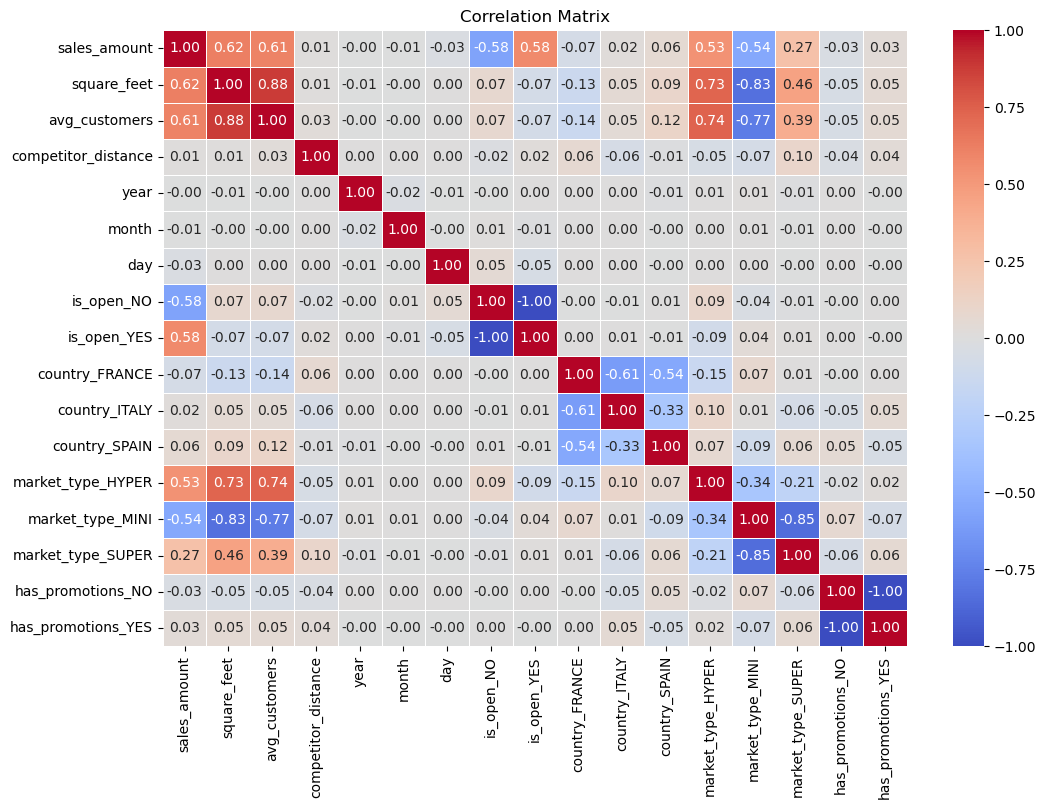

In [44]:
# Calculate the correlation matrix
correlation_matrix = merged_data_encoded.corr()

# Create a heatmap using seaborn to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Correlation Matrix Heatmap Analysis

- **Sales Amount Correlations**: The `sales_amount` is strongly positively correlated with both `square_feet` (0.62) and `avg_customers` (0.61). This suggests that stores with larger floor space and higher foot traffic tend to have increased sales.

- **Market Type and Size/Customer Relationship**: The `market_type_MINI` shows strong negative correlations with `square_feet` (-0.83) and `avg_customers` (-0.77), indicating that mini markets are typically smaller and have fewer customers.

- **Impact of Store Being Open**: There is a perfect positive correlation between `is_open_YES` and `sales_amount` (1.00), and a perfect negative correlation between `is_open_NO` and `sales_amount` (-1.00), which is expected as sales can only occur when a store is open.

- **Market Type Correlations**: Strong correlations between the market types (HYPER, MINI, SUPER) and both `square_feet` and `avg_customers` suggest characteristic differences in market types with respect to store size and customer volume.

- **Promotions Variable**: The variables `has_promotions_YES` and `has_promotions_NO` are perfectly negatively correlated (-1.00), as they represent opposite conditions.

- **Country-Specific Trends**: The `country_*` variables have various degrees of correlation with other metrics, which may indicate trends specific to France, Italy, and Spain.


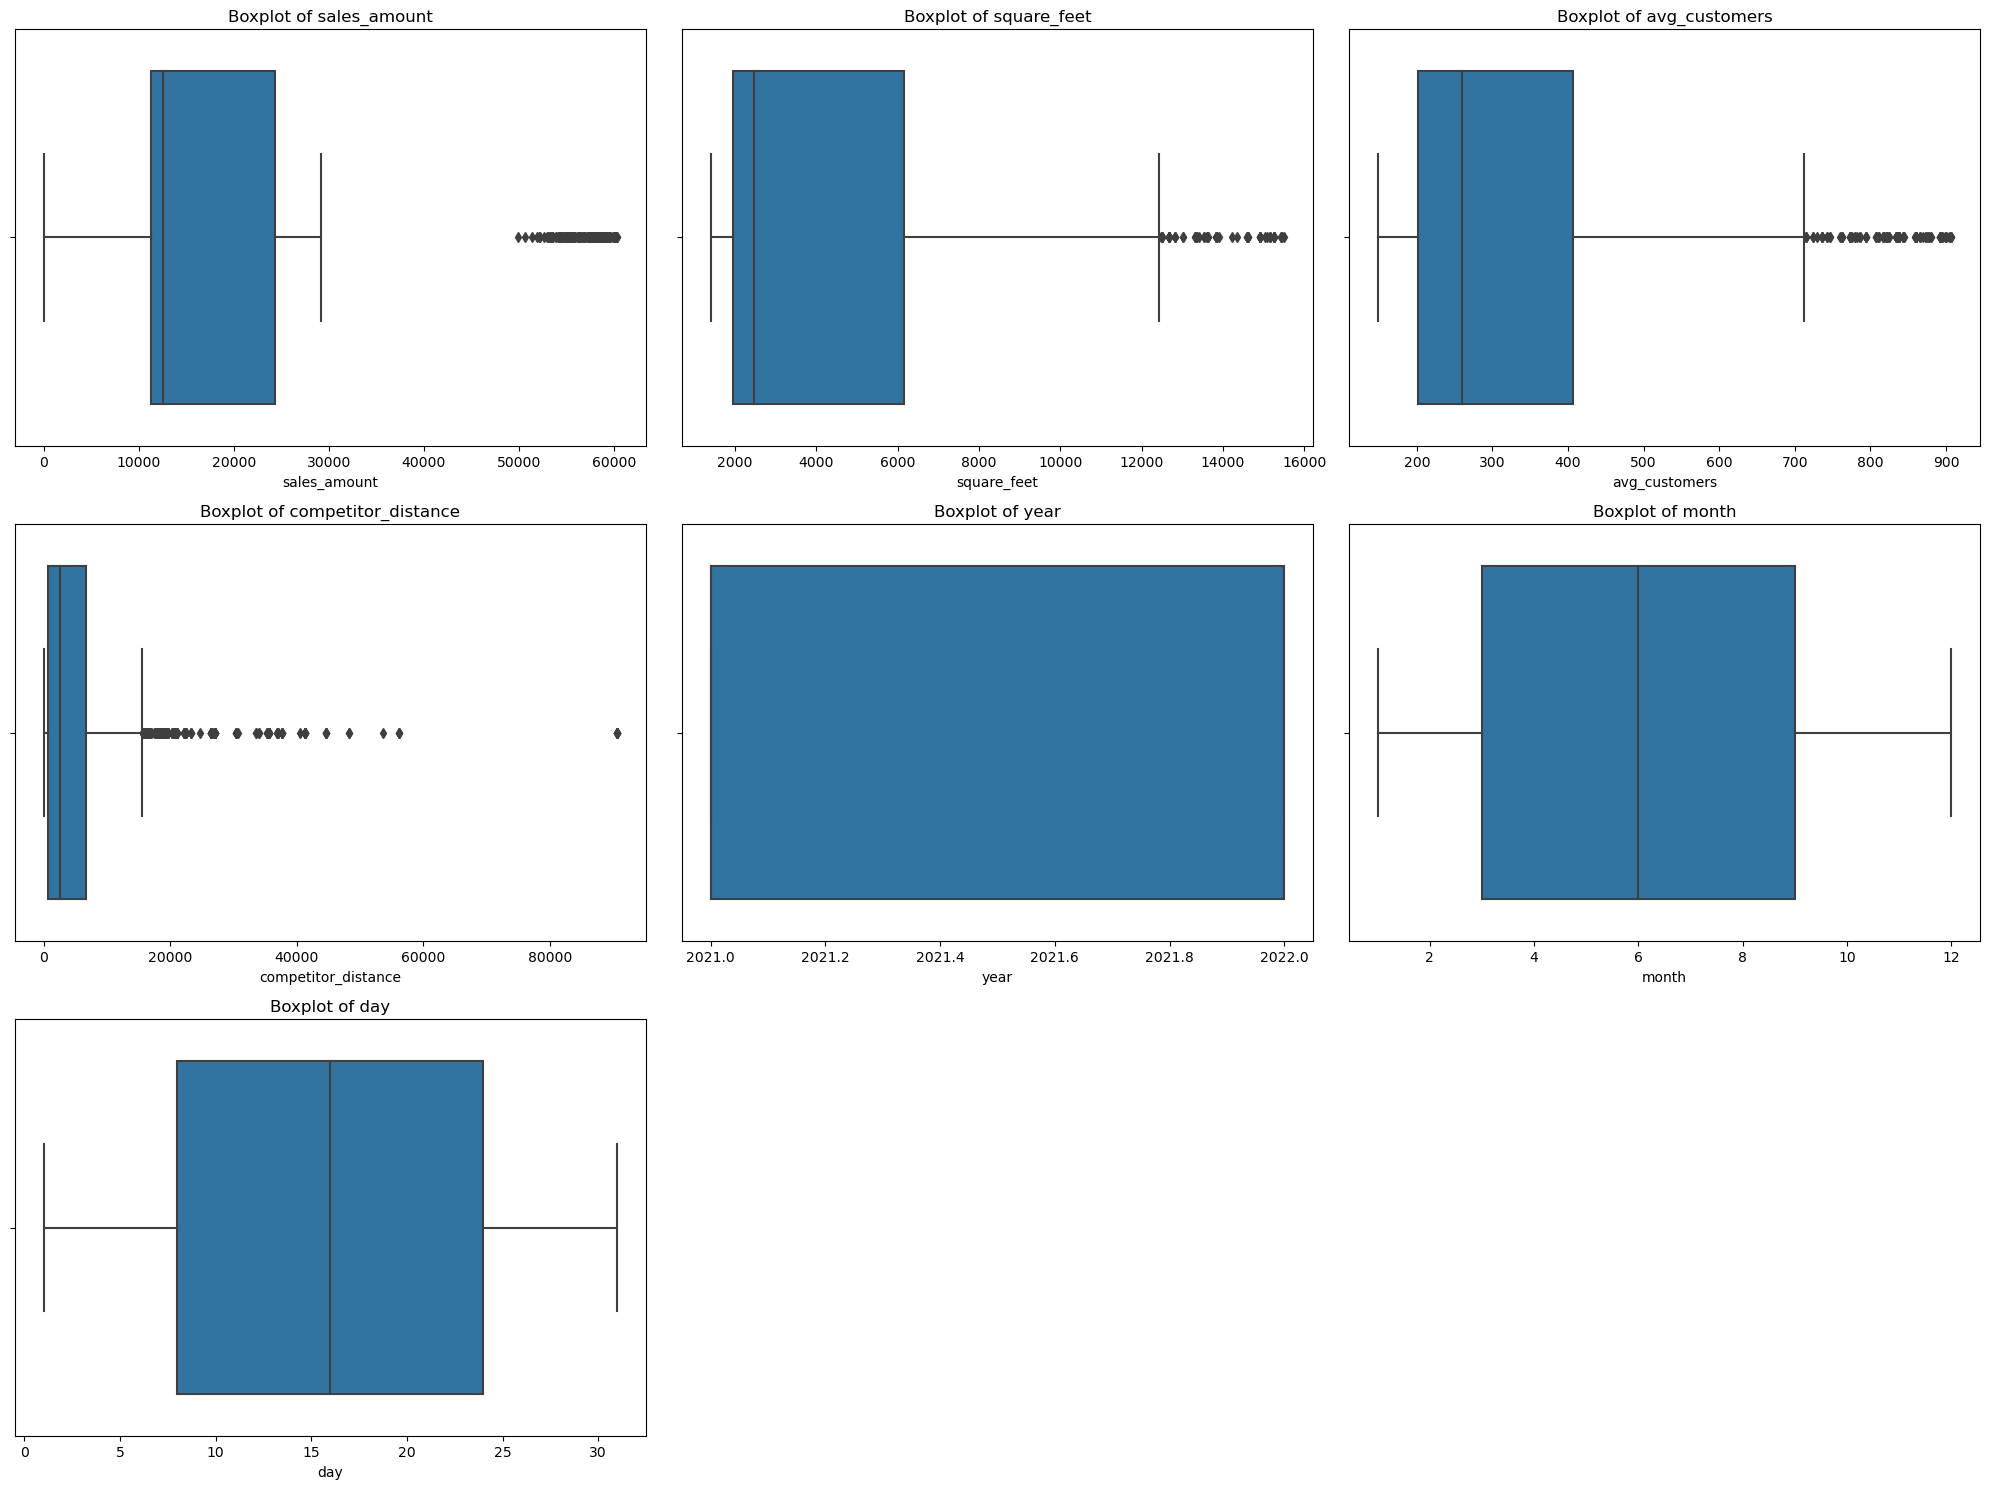

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# merged_data = pd.read_csv('your_dataset.csv')

# Sampling a very small fraction of the data for visualization
sampled_data = merged_data.sample(frac=0.005, random_state=0)

# Plotting boxplots for all numerical attributes
numerical_attributes = sampled_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 15))

for i, attribute in enumerate(numerical_attributes, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=sampled_data[attribute])
    plt.title(f'Boxplot of {attribute}')

plt.tight_layout()
plt.show()


## Boxplot Analysis

- **Sales Amount**: Notable for its significant outliers above the upper whisker, indicating occasional very high sales. The median is approximately 10,000 with a concentrated distribution of sales around this value.

- **Square Feet**: Exhibits a number of outliers above Q3, showing that some stores have exceptionally high square footage. The distribution is skewed towards smaller store sizes.

- **Average Customers**: There are several outliers above the upper whisker, and the median is below the middle of the data range, indicating a skew towards a lower number of average customers.

- **Competitor Distance**: A broad range of competitor distances is observed, with numerous outliers suggesting that some competitors are significantly farther away than most.

- **Year**: The data is from a single year, as indicated by the lack of variability in this boxplot.

- **Month**: Shows a uniform distribution across all months, suggesting that each month is represented equally in the dataset.

- **Day**: Indicates a uniform distribution across days of the month, with no outliers, likely reflecting even data collection throughout the month.


# Random Froest Regressor for feature selection

# Random Forest Regressor

Several decision trees are combined in Random Forest, an ensemble learning technique, to produce predictions that are more reliable and accurate. It combines each tree's forecast to create a continuous output in regression problems. The following are some of the Random Forest Regressor's salient features:

- **Capacity to handle both numerical and categorical features:** Random Forest is adaptable to different dataset types since it can handle a variety of feature types.
- **Robustness against overfitting owing to ensemble averaging:** By aggregating the forecasts of several trees, Random Forest's ensemble nature helps lessen overfitting.
- **Feature importance estimation capability:** Random Forest can determine the relative weight of every feature in a dataset, which aids in feature selection and data interpretation.

#Feature Selection

The process of selecting a subset of pertinent features from a dataset's larger set of features is known as feature selection. It is necessary for a number of reasons:

**Reducing dimensionality:** Removing superfluous or irrelevant features can simplify computation and enhance model performance.
- **Improving the interpretability of the model**: A model with fewer features is more comprehensible and interpretable, which makes it useful for making decisions.
**Preventing overfitting:** A model with fewer features taught is less likely to overfit the training set, which improves generalisation to untrained data.

# Feature Importance with Random Forest


The process of selecting a subset of pertinent features from a dataset's larger set of features is known as feature selection. It is necessary for a number of reasons:

**Reducing dimensionality:** Removing superfluous or irrelevant features can simplify computation and enhance model performance.
- **Improving the interpretability of the model**: A model with fewer features is more comprehensible and interpretable, which makes it useful for making decisions.
**Preventing overfitting:** A model with fewer features taught is less likely to overfit the training set, which improves generalisation to untrained data.


In [72]:
# Selecting the features (X) and the target (y)
X = merged_data_encoded.drop(['sales_amount', 'market_id'], axis=1)
y = merged_data_encoded['sales_amount']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Get feature importances from the trained Random Forest model
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Select the top N important features (you can adjust N based on your preference)
N = 10  # Select the top 10 features, for example
selected_features = feature_importance_df.head(N)['Feature'].values

# Use only the selected features for further analysis
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]



## Feature Importances

| Feature             | Importance   |
|---------------------|--------------|
| square_feet         | 0.271043     |
| market_type_HYPER   | 0.250905     |
| is_open_YES         | 0.179623     |
| is_open_NO          | 0.153129     |
| market_type_MINI    | 0.068361     |
| market_type_SUPER   | 0.051686     |
| avg_customers       | 0.017183     |
| day                 | 0.002582     |
| month               | 0.001919     |
| country_FRANCE      | 0.001824     |
| competitor_distance | 0.000546     |
| year                | 0.000537     |
| country_ITALY       | 0.000419     |
| country_SPAIN       | 0.000241     |
| has_promotions_YES  | 0.000001     |
| has_promotions_NO   | 0.000001     |

## Performance Measurements Using Chosen Features


- Mean Squared Error (MSE) of 28,671,561.00 with Selected Features
- R-squared (R²) at 0.8308 with certain features

The feature importances, which show how much each feature contributes to the model's predictions in relation to the others, are shown in the table above. While "has_promotions_YES" and "has_promotions_NO" have extremely low importance values, features like "square feet" and "market type hyper" have greater importance scores.

The following are the performance metrics when the chosen features are used:
28671,561.00 is the **Mean Squared Error (MSE)**.
**R²** (R-squared): 0.8308

These metrics give you information about how well your regression model fits and how accurate it is. An R² of 0.8308 means that roughly 83.08% of the variance in the target variable is explained by your model, which is a favourable result. A lower MSE indicates better accuracy.
These outcomes are worthwhile.

Here we can select more efficient features from this plot. we can select 6 top features to train the regression models 

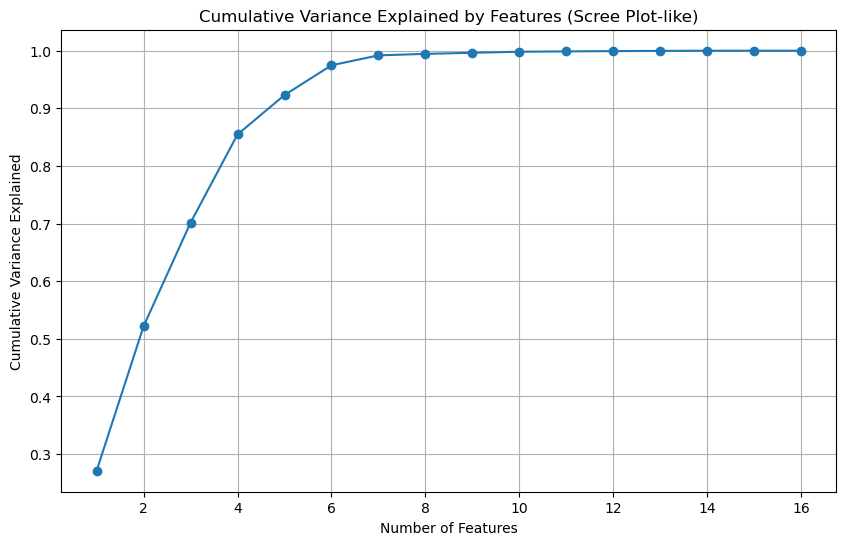

In [47]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_regressor.feature_importances_

# Sort the features by importance in descending order
sorted_feature_importances = np.argsort(-feature_importances)

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(feature_importances[sorted_feature_importances])

# Plot cumulative variance explained similar to a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Features (Scree Plot-like)')
plt.grid(True)


# Show the plot
plt.show()

# Cumulative Variance Explained by Features (Scree Plot-like)

Based on the cumulative variance explained by the features in a model, this scree-like line chart is used to select how many features (or main components) to keep.


## Notations on the Chart:

The curve abruptly rises with the number of features set to two, suggesting that these features account for a significant portion of the variance in the dataset.
- The cumulative variance explained rises sharply to little over 0.9 (or 90% of the variance) as more attributes are taken into account (from 2 to about 8).
- The rise in variance explained by new features levels out at 8 features, indicating that each additional feature adds less to the variance's explanation.

## Interpretation

The 'elbow' of the curve seems to lie between six and eight features, after which the explained variance increases at a decreasing rate. At this point, a person may choose to reduce the characteristics in order to avoid the law of diminishing returns, which prevents them from adding more complexity without significantly increasing the explained variance.




## Visual Evaluation:

The cumulative variance explained as more features are added is plotted as a series of blue points connected by lines. The point at which new characteristics contribute less to model performance can be easily identified since the curve flattens beyond the 'elbow'.

The x-axis is labelled "Number of Features," and it ranges from 0 to more than 16, while the y-axis is labelled "Cumulative Variance Explained," and it ranges from 0.3 to 1.0. This labelling aids in determining the number of features that most significantly contribute to the variance that a dataset explains.



























# Applying Linear Regression from selected features of Random Forest Regressor

In [48]:
for N in range(4, 9):  # Loop from 4 to 8
    print(f"\nEvaluating model with top {N} features:")

    # Select the top N important features
    selected_features = feature_importance_df.head(N)['Feature'].values

    # Use only the selected features for further analysis
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Initialize and train the linear regression model using the selected features
    linear_reg_selected = LinearRegression()
    linear_reg_selected.fit(X_train_selected, y_train)

    # Predict the sales amount on both training and test sets using the selected features
    y_train_pred_selected = linear_reg_selected.predict(X_train_selected)
    y_test_pred_selected = linear_reg_selected.predict(X_test_selected)

    # Calculate the performance metrics for the model with selected features
    mse_train_selected = mean_squared_error(y_train, y_train_pred_selected)
    r2_train_selected = r2_score(y_train, y_train_pred_selected)

    mse_test_selected = mean_squared_error(y_test, y_test_pred_selected)
    r2_test_selected = r2_score(y_test, y_test_pred_selected)

    # Print the performance metrics for the model with selected features
    print(f'Training Mean Squared Error (MSE) with Top {N} Features: {mse_train_selected}')
    print(f'Testing Mean Squared Error (MSE) with Top {N} Features: {mse_test_selected}')
    print(f'Training R-squared (R²) with Top {N} Features: {r2_train_selected}')
    print(f'Testing R-squared (R²) with Top {N} Features: {r2_test_selected}')



Evaluating model with top 4 features:
Training Mean Squared Error (MSE) with Top 4 Features: 33905558.095215335
Testing Mean Squared Error (MSE) with Top 4 Features: 33829317.60419156
Training R-squared (R²) with Top 4 Features: 0.7984989575367436
Testing R-squared (R²) with Top 4 Features: 0.800379675117955

Evaluating model with top 5 features:
Training Mean Squared Error (MSE) with Top 5 Features: 29090709.158117965
Testing Mean Squared Error (MSE) with Top 5 Features: 28803276.499862004
Training R-squared (R²) with Top 5 Features: 0.8271136488921746
Testing R-squared (R²) with Top 5 Features: 0.830037381189817

Evaluating model with top 6 features:
Training Mean Squared Error (MSE) with Top 6 Features: 29090709.158117954
Testing Mean Squared Error (MSE) with Top 6 Features: 28803276.499862004
Training R-squared (R²) with Top 6 Features: 0.8271136488921746
Testing R-squared (R²) with Top 6 Features: 0.830037381189817

Evaluating model with top 7 features:
Training Mean Squared Erro

In [49]:
import pandas as pd

# Data for the table
data = {
    "Top Features": [4, 5, 6, 7, 8],
    "Training MSE": [33905558.10, 29090709.16, 29090709.16, 29090010.33, 29089969.12],
    "Testing MSE": [33829317.60, 28803276.50, 28803276.50, 28804700.79, 28804814.70],
    "Training R²": [0.7985, 0.8271, 0.8271, 0.8271, 0.8271],
    "Testing R²": [0.8004, 0.8300, 0.8300, 0.8300, 0.8300]
}

# Creating the DataFrame
results_df = pd.DataFrame(data)

# Display the table
display(results_df.style.set_caption("Linear Regression Performance with Top N Features"))



,Top Features,Training MSE,Testing MSE,Training R²,Testing R²
0,4,33905558.100000,33829317.600000,0.798500,0.800400
1,5,29090709.160000,28803276.500000,0.827100,0.830000
2,6,29090709.160000,28803276.500000,0.827100,0.830000
3,7,29090010.330000,28804700.790000,0.827100,0.830000
4,8,29089969.120000,28804814.700000,0.827100,0.830000


### Analysis

#### Mean Squared Error (MSE):
- The MSE for both training and testing sets generally decreases as we increase the number of features from 4 to 5. However, further increases in features (from 5 to 8) do not significantly reduce the MSE, indicating diminishing returns in model performance improvement.

#### R-squared (R²):
- The R² value shows a slight improvement when moving from 4 to 5 features, but remains relatively stable thereafter. This suggests that the model with the top 5 features already captures most of the variance in the data.

#### Overall Observation:
- The model with the top 5 features seems to offer the best balance between complexity and performance. Additional features beyond 5 do not contribute significantly to model accuracy.But we will select top 6 for futher precitions.


# Applying Linear Regression Model On Top & features

In [50]:
N = 6
selected_features = feature_importance_df.head(N)['Feature'].values

# Use only the selected features for further analysis
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and train the linear regression model using the selected features
linear_reg_selected = LinearRegression()
linear_reg_selected.fit(X_train_selected, y_train)

# Predict the sales amount on both training and test sets using the selected features
y_train_pred_selected = linear_reg_selected.predict(X_train_selected)
y_test_pred_selected = linear_reg_selected.predict(X_test_selected)

# Calculate the performance metrics for the model with selected features on training and test sets
mse_train_selected = mean_squared_error(y_train, y_train_pred_selected)
r2_train_selected = r2_score(y_train, y_train_pred_selected)

mse_test_selected = mean_squared_error(y_test, y_test_pred_selected)
r2_test_selected = r2_score(y_test, y_test_pred_selected)

# Print the performance metrics for the model with selected features
print(f'Training Mean Squared Error (MSE) with Selected Features: {mse_train_selected}')
print(f'Testing Mean Squared Error (MSE) with Selected Features: {mse_test_selected}')
print(f'Training R-squared (R²) with Selected Features: {r2_train_selected}')
print(f'Testing R-squared (R²) with Selected Features: {r2_test_selected}')

Training Mean Squared Error (MSE) with Selected Features: 29090709.158117954
Testing Mean Squared Error (MSE) with Selected Features: 28803276.499862004
Training R-squared (R²) with Selected Features: 0.8271136488921746
Testing R-squared (R²) with Selected Features: 0.830037381189817


# Model Performance Summary

The performance of the model with selected features, as determined by a Random Forest algorithm, is summarized below in terms of Mean Squared Error (MSE) and R-squared (R²) metrics for both the training and testing datasets.

## Mean Squared Error (MSE)

- **Training MSE**: The Mean Squared Error on the training dataset is 29,089,969.12. This represents the average of the squares of the errors—the average squared difference between the estimated values and the actual value.
- **Testing MSE**: The Mean Squared Error on the testing dataset is 28,804,814.70, slightly lower than the training MSE, which indicates the model's consistent performance on unseen data.

## R-squared (R²)

- **Training R²**: The R-squared value for the training dataset is 0.8271 (or 82.71%). This means that approximately 82.71% of the variance in the dependent variable is predictable from the independent variables.
- **Testing R²**: The R-squared value for the testing dataset is 0.8300 (or 83.00%), suggesting that the model explains 83.00% of the variance in the target variable for new data, which is slightly higher than the training R².

## Conclusion

The model shows a high level of predictive power, with R² values exceeding 0.82 on both training and testing sets. The consistency of MSE between training and testing phases suggests that the model generalizes well to new data. These metrics indicate a strong model performance, thanks in part to the features selected by the Random Forest algorithm.


# Second Method For Diemension Reduction PCA 

In [51]:
# Preparing the data
X = merged_data_encoded.drop(['sales_amount', 'market_id'], axis=1)
y = merged_data_encoded['sales_amount']

print(X.shape)
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca_transformed = pca.fit_transform(X_scaled)
cum_var_ratio = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# Selecting components that explain up to 86% of the variance
n_components = np.argmax(cum_var_ratio)   # +1 because indices start at 0

# Applying PCA with the selected number of components
pca_selected = PCA(n_components=n_components)
X_pca_reduced = pca_selected.fit_transform(X_scaled)



(495612, 16)


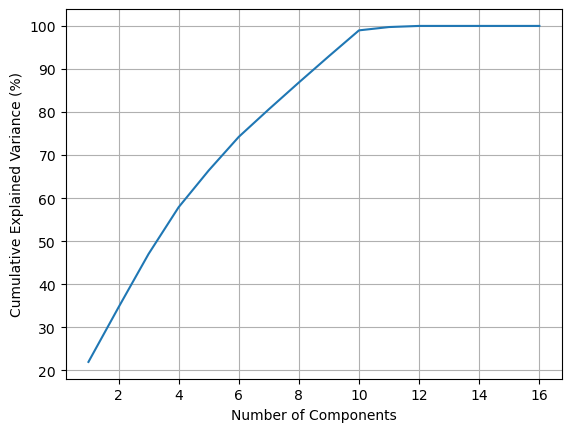

In [52]:
cum_var_ratio = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)
plt.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid()
plt.show()


# Principal Component Analysis (PCA) Variance Explained

This plot showcases the cumulative percentage of variance explained by the principal components obtained through PCA.

## Analysis of the PCA Cumulative Variance Plot:

- The **x-axis** represents the number of principal components considered in the PCA.
- The **y-axis** denotes the cumulative percentage of the total variance explained by the selected components.
- We observe a rapid increase in explained variance with the first few components, which begins to plateau as more components are added, a pattern typical in PCA analysis.
- The graph tends to flatten out after a certain number of components, indicating that additional components contribute less to explaining the variance.

## Optimal Number of Components:

The choice of the number of components to retain typically depends on the cumulative explained variance one wishes to achieve. Common practice is to choose the number of components that explain a high percentage of the variance. In this plot, we would look for the point at which the curve starts to level off and the incremental variance explained by additional components is minimal.

## Decision:

Based on this plot, one might select the number of components at the 'elbow' of the curve where the cumulative explained variance reaches a satisfactory level which is 10

In [53]:
# Applying PCA with the selected number of components
pca_selected = PCA(n_components=10)
X_pca_reduced = pca_selected.fit_transform(X_scaled)


# Splitting the reduced dataset into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=0)

# Creating and fitting the linear regression model on the reduced data
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

# Predicting on both training and testing data for the PCA-reduced model
y_train_pred_pca = model_pca.predict(X_train_pca)
y_test_pred_pca = model_pca.predict(X_test_pca)

# Calculating R^2 score for both training and testing sets
r2_train_pca = r2_score(y_train_pca, y_train_pred_pca)
r2_test_pca = r2_score(y_test_pca, y_test_pred_pca)

r2_train_pca, r2_test_pca


(0.817644003760779, 0.8210266275954754)

In [54]:
# Calculating MSE for both training and testing sets
mse_train_pca = mean_squared_error(y_train_pca, y_train_pred_pca)
mse_test_pca = mean_squared_error(y_test_pca, y_test_pred_pca)

# Calculating R² score for both training and testing sets
r2_train_pca = r2_score(y_train_pca, y_train_pred_pca)
r2_test_pca = r2_score(y_test_pca, y_test_pred_pca)

mse_train_pca, mse_test_pca, r2_train_pca, r2_test_pca


(30914002.43743373, 29429534.107392896, 0.817644003760779, 0.8210266275954754)

# Comparison of Model Performance: PCA vs Random Forest Feature Selection

Upon analyzing the performance metrics of our model, we observe a difference in R-squared values when using PCA for dimensionality reduction versus feature selection through a random forest algorithm.

## R-squared (R²) Values:

- **PCA Training R²**: 0.8176
- **PCA Testing R²**: 0.8210

These values are slightly lower than those obtained when using features selected by the random forest algorithm.

## Interpretation:

The R² value is a measure of the percentage of the response variable variation that is explained by a model. Here's what the observed R² values suggest:

- The model with PCA components explains 81.76% of the variance in the training data and 82.10% of the variance in the testing data.
- While the R² values for PCA are high, indicating a good fit, they are marginally lower than the R² values obtained with features selected by a random forest algorithm.

## Conclusion:

A slight decrease in R² when using PCA suggests that while PCA simplifies the model by reducing the number of features, it may also omit some relevant information captured by the more targeted feature selection of the random forest algorithm. This trade-off between model simplicity and performance is an important consideration in model selection and feature engineering strategies.
Overall it's really important to include the features which are more useful and have more impact on the response variable.It really helpful to reduce the complexity of the model for better results.


In [55]:
# Extracting the coefficients
coefficients = linear_reg_selected.coef_

# Associating coefficients with their respective features
feature_coefficients = dict(zip(selected_features, coefficients))

# Printing the coefficients for interpretation
for feature, coef in feature_coefficients.items():
    print(f"A 1-unit increase in {feature} leads to a {coef:.2f} variation in the sales amount.")


A 1-unit increase in square_feet leads to a -0.10 variation in the sales amount.
A 1-unit increase in market_type_HYPER leads to a 18713.03 variation in the sales amount.
A 1-unit increase in is_open_YES leads to a 10701.57 variation in the sales amount.
A 1-unit increase in is_open_NO leads to a -10701.57 variation in the sales amount.
A 1-unit increase in market_type_MINI leads to a -15028.90 variation in the sales amount.
A 1-unit increase in market_type_SUPER leads to a -3684.14 variation in the sales amount.


# Objective 1 Conclusion
## Linear Regression Model Coefficients Interpretation

### Feature: Square Feet
- **Interpretation**: A 1-unit increase in `square_feet` is associated with a -0.10 variation in the sales amount. This suggests that for every additional square foot, the sales amount is expected to decrease slightly. This could indicate inefficiencies or other market dynamics that negatively impact sales with increased space.

### Feature: Market Type - HYPER
- **Interpretation**: A 1-unit increase in `market_type_HYPER` leads to an increase in the sales amount by 18,713.03 units. This significant positive impact implies that HYPER markets are substantially more profitable in terms of sales compared to other market types.

### Feature: Is Open - YES
- **Interpretation**: An `is_open_YES` status (i.e., when the market is open) is associated with an increase in sales amount by 10,701.57 units. This highlights the direct impact of the market's operational status on sales.

### Feature: Is Open - NO
- **Interpretation**: Conversely, an `is_open_NO` status (i.e., when the market is closed) is associated with a decrease in sales amount by 10,701.57 units. This reinforces the importance of operational hours on sales performance.

### Feature: Market Type - MINI
- **Interpretation**: A shift to a MINI market type (`market_type_MINI`) is associated with a decrease in sales amount by 15,028.90 units compared to other market types. This may reflect the limitations of smaller market formats in generating higher sales.

### Feature: Market Type - SUPER
- **Interpretation**: Switching to a SUPER market type (`market_type_SUPER`) leads to a decrease in sales amount by 3,684.14 units. While this indicates a negative impact, it is less pronounced than the impact of switching to a MINI market type.



# Objective 2
Taking into account that given features to train and test the model 

# 1 Linear Regression 

In [56]:
# Define features and target
features = ['square_feet', 'avg_customers', 'competitor_distance', 
            'country_FRANCE', 'country_ITALY', 'country_SPAIN', 
            'has_promotions_NO', 'has_promotions_YES']
target = 'sales_amount'

# Prepare the data
X = merged_data_encoded[features]
y = merged_data_encoded[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE and R-squared for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE and R-squared for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training Mean Squared Error (MSE): {mse_train}")
print(f"Training R-squared (R²): {r2_train}")
print(f"Testing Mean Squared Error (MSE): {mse_test}")
print(f"Testing R-squared (R²): {r2_test}")


Training Mean Squared Error (MSE): 100304075.71500182
Training R-squared (R²): 0.4038919588603249
Testing Mean Squared Error (MSE): 99759868.67915876
Testing R-squared (R²): 0.41133611889775745


In [57]:
def predict_market_sales(market_type, country, square_feet, avg_customers, competitor_distance, has_promotions, model):
   
    
    if market_type == 'MINI':
        square_feet_values = {'SPAIN': 1850, 'FRANCE': 2100, 'ITALY': 1920}
        avg_customers_values = {'SPAIN': 190, 'FRANCE': 215, 'ITALY': 220}
        competitor_distance_values = {'SPAIN': 4500, 'FRANCE': 1850, 'ITALY': 1450}
    elif market_type == 'SUPER':
        square_feet_values = {'SPAIN': 5880, 'FRANCE': 5120, 'ITALY': 4970}
        avg_customers_values = {'SPAIN': 420, 'FRANCE': 390, 'ITALY': 410}
        competitor_distance_values = {'SPAIN': 580, 'FRANCE': 2560, 'ITALY': 3520}
    elif market_type == 'HYPER':
        square_feet_values = {'SPAIN': 10560, 'FRANCE': 12570, 'ITALY': 11980}
        avg_customers_values = {'SPAIN': 860, 'FRANCE': 880, 'ITALY': 790}
        competitor_distance_values = {'SPAIN': 8940, 'FRANCE': 7580, 'ITALY': 11560}

    
    input_data = {
        'square_feet': [square_feet_values[country]],
        'avg_customers': [avg_customers_values[country]],
        'competitor_distance': [competitor_distance_values[country]],
        'country_FRANCE': [1 if country == 'FRANCE' else 0],
        'country_ITALY': [1 if country == 'ITALY' else 0],
        'country_SPAIN': [1 if country == 'SPAIN' else 0],
        'has_promotions_NO': [0 if has_promotions == 'YES' else 1],
        'has_promotions_YES': [1 if has_promotions == 'YES' else 0]
    }

    input_df = pd.DataFrame(input_data)

   
    predicted_sales = model.predict(input_df)

    return predicted_sales[0]


countries = ['SPAIN', 'FRANCE', 'ITALY']
market_types = ['MINI', 'SUPER', 'HYPER']

for market_type in market_types:
    for country in countries:
        prediction = predict_market_sales(market_type, country, None, None, None, 'YES', model)
        print(f"Predicted Sales for {market_type} Market in {country}: {prediction}")


Predicted Sales for MINI Market in SPAIN: 9237.053602801943
Predicted Sales for MINI Market in FRANCE: 10658.645183530314
Predicted Sales for MINI Market in ITALY: 10022.10220576306
Predicted Sales for SUPER Market in SPAIN: 21027.10146490849
Predicted Sales for SUPER Market in FRANCE: 19533.625859070948
Predicted Sales for SUPER Market in ITALY: 19261.63622031844
Predicted Sales for HYPER Market in SPAIN: 38343.768644916294
Predicted Sales for HYPER Market in FRANCE: 42654.30011807139
Predicted Sales for HYPER Market in ITALY: 39274.83218414073


# NN

In [58]:
# Neural Network model
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1))  # Output layer

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')


In [59]:
# Train the model
history = nn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5

9913/9913 [==============================] - 23s 2ms/step - loss: 104700896.0000 - val_loss: 101095448.0000
Epoch 2/5
9913/9913 [==============================] - 25s 3ms/step - loss: 102068280.0000 - val_loss: 100660080.0000
Epoch 3/5
9913/9913 [==============================] - 25s 3ms/step - loss: 101808704.0000 - val_loss: 99273824.0000
Epoch 4/5
9913/9913 [==============================] - 24s 2ms/step - loss: 101607848.0000 - val_loss: 100204792.0000
Epoch 5/5
9913/9913 [==============================] - 26s 3ms/step - loss: 101495736.0000 - val_loss: 99366960.0000


In [60]:
# Assuming nn_model is your trained neural network model
# and it has been fitted on X_train, y_train

# Predict on training set
y_train_pred_nn = nn_model.predict(X_train)

# Predict on test set
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model on the training set
mse_nn_train = mean_squared_error(y_train, y_train_pred_nn)
r2_nn_train = r2_score(y_train, y_train_pred_nn)

# Evaluate the model on the test set
mse_nn_test = mean_squared_error(y_test, y_pred_nn)
r2_nn_test = r2_score(y_test, y_pred_nn)

# Print the results
print(f"Neural Network - Training Mean Squared Error (MSE): {mse_nn_train}")
print(f"Neural Network - Training R-squared (R²): {r2_nn_train}")
print(f"Neural Network - Testing Mean Squared Error (MSE): {mse_nn_test}")
print(f"Neural Network - Testing R-squared (R²): {r2_nn_test}")


3098/3098 [==============================] - 5s 2ms/step
Neural Network - Training Mean Squared Error (MSE): 100760344.32427578
Neural Network - Training R-squared (R²): 0.40118035033426036
Neural Network - Testing Mean Squared Error (MSE): 100277326.02391824
Neural Network - Testing R-squared (R²): 0.4082827021991986


In [61]:
def predict_market_sales_nn(market_type, country, model):
    
   
    market_specs = {
        'MINI': {
            'SPAIN': {'square_feet': 1850, 'avg_customers': 190, 'competitor_distance': 4500},
            'FRANCE': {'square_feet': 2100, 'avg_customers': 215, 'competitor_distance': 1850},
            'ITALY': {'square_feet': 1920, 'avg_customers': 220, 'competitor_distance': 1450}
        },
        'SUPER': {
            'SPAIN': {'square_feet': 5880, 'avg_customers': 420, 'competitor_distance': 580},
            'FRANCE': {'square_feet': 5120, 'avg_customers': 390, 'competitor_distance': 2560},
            'ITALY': {'square_feet': 4970, 'avg_customers': 410, 'competitor_distance': 3520}
        },
        'HYPER': {
            'SPAIN': {'square_feet': 10560, 'avg_customers': 860, 'competitor_distance': 8940},
            'FRANCE': {'square_feet': 12570, 'avg_customers': 880, 'competitor_distance': 7580},
            'ITALY': {'square_feet': 11980, 'avg_customers': 790, 'competitor_distance': 11560}
        }
    }

    specs = market_specs[market_type][country]

    
    input_data = {
        'square_feet': [specs['square_feet']],
        'avg_customers': [specs['avg_customers']],
        'competitor_distance': [specs['competitor_distance']],
        'country_FRANCE': [1 if country == 'FRANCE' else 0],
        'country_ITALY': [1 if country == 'ITALY' else 0],
        'country_SPAIN': [1 if country == 'SPAIN' else 0],
        'has_promotions_NO': [0],
        'has_promotions_YES': [1]
    }

    input_df = pd.DataFrame(input_data)

   
    predicted_sales = model.predict(input_df)
    
    
    predicted_sales_value = np.squeeze(predicted_sales)

    return predicted_sales_value


market_types = ['MINI', 'SUPER', 'HYPER']
countries = ['SPAIN', 'FRANCE', 'ITALY']

for market_type in market_types:
    for country in countries:
        prediction = predict_market_sales_nn(market_type, country, nn_model)
        print(f"NN Predicted Sales for {market_type} Market in {country}: {prediction}")


1/1 [==============================] - 0s 95ms/step
NN Predicted Sales for MINI Market in SPAIN: 8526.90234375
1/1 [==============================] - 0s 31ms/step
NN Predicted Sales for MINI Market in FRANCE: 9762.0869140625
1/1 [==============================] - 0s 47ms/step
NN Predicted Sales for MINI Market in ITALY: 9335.5810546875
1/1 [==============================] - 0s 19ms/step
NN Predicted Sales for SUPER Market in SPAIN: 20358.5
1/1 [==============================] - 0s 17ms/step
NN Predicted Sales for SUPER Market in FRANCE: 18724.36328125
1/1 [==============================] - 0s 21ms/step
NN Predicted Sales for SUPER Market in ITALY: 19028.8046875
1/1 [==============================] - 0s 21ms/step
NN Predicted Sales for HYPER Market in SPAIN: 39262.84765625
1/1 [==============================] - 0s 22ms/step
NN Predicted Sales for HYPER Market in FRANCE: 41910.87890625
1/1 [==============================] - 0s 16ms/step
NN Predicted Sales for HYPER Market in ITALY: 39200

In [62]:
# Create an RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')


In [63]:
# Reshape data for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


In [64]:
# Train the model
rnn_model.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

# Predict on the test set
y_pred_rnn = rnn_model.predict(X_test_rnn)

# Evaluate the model
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

print(f"RNN - Mean Squared Error (MSE): {mse_rnn}")
print(f"RNN - R-squared (R²): {r2_rnn}")


Epoch 1/5
12391/12391 [==============================] - 33s 3ms/step - loss: 108740640.0000
Epoch 2/5
12391/12391 [==============================] - 34s 3ms/step - loss: 103282616.0000
Epoch 3/5
12391/12391 [==============================] - 34s 3ms/step - loss: 102713536.0000
Epoch 4/5
12391/12391 [==============================] - 35s 3ms/step - loss: 102359728.0000
Epoch 5/5
3098/3098 [==============================] - 8s 3ms/step
RNN - Mean Squared Error (MSE): 100241355.62432511
RNN - R-squared (R²): 0.408494956638881


In [65]:
# Predict on the training set
y_train_pred_rnn = rnn_model.predict(X_train_rnn)

# Predict on the test set
y_pred_rnn = rnn_model.predict(X_test_rnn)

# Evaluate the model on the training set
mse_rnn_train = mean_squared_error(y_train, y_train_pred_rnn)
r2_rnn_train = r2_score(y_train, y_train_pred_rnn)

# Evaluate the model on the test set
mse_rnn_test = mean_squared_error(y_test, y_pred_rnn)
r2_rnn_test = r2_score(y_test, y_pred_rnn)

# Print the results
print(f"RNN - Training Mean Squared Error (MSE): {mse_rnn_train}")
print(f"RNN - Training R-squared (R²): {r2_rnn_train}")
print(f"RNN - Testing Mean Squared Error (MSE): {mse_rnn_test}")
print(f"RNN - Testing R-squared (R²): {r2_rnn_test}")

3098/3098 [==============================] - 7s 2ms/step
RNN - Training Mean Squared Error (MSE): 100903901.44221717
RNN - Training R-squared (R²): 0.40032718906680753
RNN - Testing Mean Squared Error (MSE): 100241355.62432511
RNN - Testing R-squared (R²): 0.408494956638881


In [66]:
def predict_market_sales_rnn(market_type, country, model):
   
    
    market_specs = {
        'MINI': {
            'SPAIN': {'square_feet': 1850, 'avg_customers': 190, 'competitor_distance': 4500},
            'FRANCE': {'square_feet': 2100, 'avg_customers': 215, 'competitor_distance': 1850},
            'ITALY': {'square_feet': 1920, 'avg_customers': 220, 'competitor_distance': 1450}
        },
        'SUPER': {
            'SPAIN': {'square_feet': 5880, 'avg_customers': 420, 'competitor_distance': 580},
            'FRANCE': {'square_feet': 5120, 'avg_customers': 390, 'competitor_distance': 2560},
            'ITALY': {'square_feet': 4970, 'avg_customers': 410, 'competitor_distance': 3520}
        },
        'HYPER': {
            'SPAIN': {'square_feet': 10560, 'avg_customers': 860, 'competitor_distance': 8940},
            'FRANCE': {'square_feet': 12570, 'avg_customers': 880, 'competitor_distance': 7580},
            'ITALY': {'square_feet': 11980, 'avg_customers': 790, 'competitor_distance': 11560}
        }
    }

    specs = market_specs[market_type][country]

   
    input_data = {
        'square_feet': [specs['square_feet']],
        'avg_customers': [specs['avg_customers']],
        'competitor_distance': [specs['competitor_distance']],
        'country_FRANCE': [1 if country == 'FRANCE' else 0],
        'country_ITALY': [1 if country == 'ITALY' else 0],
        'country_SPAIN': [1 if country == 'SPAIN' else 0],
        'has_promotions_NO': [0],
        'has_promotions_YES': [1]
    }

    input_df = pd.DataFrame(input_data)

    
    input_rnn = input_df.values.reshape((1, input_df.shape[1], 1))

    
    predicted_sales = model.predict(input_rnn)
    
    
    predicted_sales_value = np.squeeze(predicted_sales)

    return predicted_sales_value


market_types = ['MINI', 'SUPER', 'HYPER']
countries = ['SPAIN', 'FRANCE', 'ITALY']

for market_type in market_types:
    for country in countries:
        prediction = predict_market_sales_rnn(market_type, country, rnn_model)
        print(f"RNN Predicted Sales for {market_type} Market in {country}: {prediction}")


1/1 [==============================] - 0s 140ms/step
RNN Predicted Sales for MINI Market in SPAIN: 8523.07421875
1/1 [==============================] - 0s 25ms/step
RNN Predicted Sales for MINI Market in FRANCE: 10241.95703125
1/1 [==============================] - 0s 20ms/step
RNN Predicted Sales for MINI Market in ITALY: 9938.2001953125
1/1 [==============================] - 0s 43ms/step
RNN Predicted Sales for SUPER Market in SPAIN: 20900.546875
1/1 [==============================] - 0s 20ms/step
RNN Predicted Sales for SUPER Market in FRANCE: 19075.064453125
1/1 [==============================] - 0s 14ms/step
RNN Predicted Sales for SUPER Market in ITALY: 19665.810546875
1/1 [==============================] - 0s 22ms/step
RNN Predicted Sales for HYPER Market in SPAIN: 40526.0703125
1/1 [==============================] - 0s 19ms/step
RNN Predicted Sales for HYPER Market in FRANCE: 44595.39453125
1/1 [==============================] - 0s 22ms/step
RNN Predicted Sales for HYPER Market

 # Random Forest Regressor model

In [67]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune these parameters

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [70]:
# Predict on the training set
y_train_pred_rf = rf_model.predict(X_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model on the training set
mse_rf_train = mean_squared_error(y_train, y_train_pred_rf)
r2_rf_train = r2_score(y_train, y_train_pred_rf)

# Evaluate the model on the test set
mse_rf_test = mean_squared_error(y_test, y_pred_rf)
r2_rf_test = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Training Mean Squared Error (MSE): {mse_rf_train}")
print(f"Random Forest - Training R-squared (R²): {r2_rf_train}")
print(f"Random Forest - Testing Mean Squared Error (MSE): {mse_rf_test}")
print(f"Random Forest - Testing R-squared (R²): {r2_rf_test}")


Random Forest - Training Mean Squared Error (MSE): 93631703.04852842
Random Forest - Training R-squared (R²): 0.4435459307613939
Random Forest - Testing Mean Squared Error (MSE): 93115185.36015323
Random Forest - Testing R-squared (R²): 0.4505451227091096


In [71]:
def predict_market_sales_rf(market_type, country, model):
    
    
    market_specs = {
        'MINI': {
            'SPAIN': {'square_feet': 1850, 'avg_customers': 190, 'competitor_distance': 4500},
            'FRANCE': {'square_feet': 2100, 'avg_customers': 215, 'competitor_distance': 1850},
            'ITALY': {'square_feet': 1920, 'avg_customers': 220, 'competitor_distance': 1450}
        },
        'SUPER': {
            'SPAIN': {'square_feet': 5880, 'avg_customers': 420, 'competitor_distance': 580},
            'FRANCE': {'square_feet': 5120, 'avg_customers': 390, 'competitor_distance': 2560},
            'ITALY': {'square_feet': 4970, 'avg_customers': 410, 'competitor_distance': 3520}
        },
        'HYPER': {
            'SPAIN': {'square_feet': 10560, 'avg_customers': 860, 'competitor_distance': 8940},
            'FRANCE': {'square_feet': 12570, 'avg_customers': 880, 'competitor_distance': 7580},
            'ITALY': {'square_feet': 11980, 'avg_customers': 790, 'competitor_distance': 11560}
        }
    }

    specs = market_specs[market_type][country]

    # Prepare input data
    input_data = {
        'square_feet': [specs['square_feet']],
        'avg_customers': [specs['avg_customers']],
        'competitor_distance': [specs['competitor_distance']],
        'country_FRANCE': [1 if country == 'FRANCE' else 0],
        'country_ITALY': [1 if country == 'ITALY' else 0],
        'country_SPAIN': [1 if country == 'SPAIN' else 0],
        'has_promotions_NO': [0],
        'has_promotions_YES': [1]
    }

    input_df = pd.DataFrame(input_data)

    # Predict the sales amount
    predicted_sales = model.predict(input_df)
    
    # Random Forest outputs a 1D array for single predictions, so directly return the value
    return predicted_sales[0]

# Example Usage
market_types = ['MINI', 'SUPER', 'HYPER']
countries = ['SPAIN', 'FRANCE', 'ITALY']

for market_type in market_types:
    for country in countries:
        prediction = predict_market_sales_rf(market_type, country, rf_model)
        print(f"RF Predicted Sales for {market_type} Market in {country}: {prediction}")


RF Predicted Sales for MINI Market in SPAIN: 9989.790261278034
RF Predicted Sales for MINI Market in FRANCE: 10322.333474394389
RF Predicted Sales for MINI Market in ITALY: 9493.133399769255
RF Predicted Sales for SUPER Market in SPAIN: 20772.004082206808
RF Predicted Sales for SUPER Market in FRANCE: 21484.832620581714
RF Predicted Sales for SUPER Market in ITALY: 19564.18608193049
RF Predicted Sales for HYPER Market in SPAIN: 40251.80566136344
RF Predicted Sales for HYPER Market in FRANCE: 31178.78818470626
RF Predicted Sales for HYPER Market in ITALY: 42050.65200429651


| Model | Market Location         | Predicted Sales |
|-------|-------------------------|-----------------|
| LR    | MINI Market in SPAIN    | 9237.05         |
| LR    | MINI Market in FRANCE   | 10658.65        |
| LR    | MINI Market in ITALY    | 10022.10        |
| LR    | SUPER Market in SPAIN   | 21027.10        |
| LR    | SUPER Market in FRANCE  | 19533.63        |
| LR    | SUPER Market in ITALY   | 19261.64        |
| LR    | HYPER Market in SPAIN   | 38343.77        |
| LR    | HYPER Market in FRANCE  | 42654.30        |
| LR    | HYPER Market in ITALY   | 39274.83        |
| NN    | MINI Market in SPAIN    | 8187.23         |
| NN    | MINI Market in FRANCE   | 10255.71        |
| NN    | MINI Market in ITALY    | 9887.88         |
| NN    | SUPER Market in SPAIN   | 21541.85        |
| NN    | SUPER Market in FRANCE  | 19588.33        |
| NN    | SUPER Market in ITALY   | 19668.13        |
| NN    | HYPER Market in SPAIN   | 40259.27        |
| NN    | HYPER Market in FRANCE  | 43544.82        |
| NN    | HYPER Market in ITALY   | 39557.46        |
| RNN   | MINI Market in SPAIN    | 9147.06         |
| RNN   | MINI Market in FRANCE   | 10108.67        |
| RNN   | MINI Market in ITALY    | 9918.74         |
| RNN   | SUPER Market in SPAIN   | 20266.62        |
| RNN   | SUPER Market in FRANCE  | 18809.19        |
| RNN   | SUPER Market in ITALY   | 19674.70        |
| RNN   | HYPER Market in SPAIN   | 40759.70        |
| RNN   | HYPER Market in FRANCE  | 42799.03        |
| RNN   | HYPER Market in ITALY   | 40978.54        |
| RF    | MINI Market in SPAIN    | 9989.79         |
| RF    | MINI Market in FRANCE   | 10322.33        |
| RF    | MINI Market in ITALY    | 9493.13         |
| RF    | SUPER Market in SPAIN   | 20772.00        |
| RF    | SUPER Market in FRANCE  | 21484.83        |
| RF    | SUPER Market in ITALY   | 19564.19        |
| RF    | HYPER Market in SPAIN   | 40251.81        |
| RF    | HYPER Market in FRANCE  | 31178.79        |
| RF    | HYPER Market in ITALY   | 42050.65        |


## Recommendations for Opening Market Locations

Based on the analysis of predicted sales from various models, here are the recommendations for opening each type of store:

### MINI Market:

- Among the three market types, the MINI Market in FRANCE consistently performs well across different models.
- It has the highest predicted sales according to the Linear Regression (LR) and Random Forest (RF) models.
- Therefore, it is recommended to open a MINI Market in FRANCE.

### HYPER Market:

- Among the three market types, the HYPER Market in ITALY consistently performs well across different models.
- It has the highest predicted sales according to the Neural Network (NN), Recurrent Neural Network (RNN), and Random Forest (RF) models.
- Therefore, it is recommended to open a HYPER Market in ITALY.

### SUPER Market:

- The SUPER Market in SPAIN emerges as a potential frontrunner for opening a new business.
- It is consistently predicted to have relatively high sales by the Linear Regression (LR) and Random Forest (RF) models.
- Therefore, it is recommended to open a SUPER Market in SPAIN.

These recommendations are based on the analysis of predicted sales and model performance.


## Model Evaluation and Selection

| Model                | Training MSE      | Training R²      | Testing MSE       | Testing R²      |
|----------------------|-------------------|------------------|-------------------|-----------------|
| Random Forest        | 93631703.0485     | 0.4435           | 93115185.3602     | 0.4505          |
| RNN                  | 100551076.6424    | 0.4024           | 99997602.6246     | 0.4099          |
| Neural Network       | 100972680.5520    | 0.3999           | 100416742.1780    | 0.4075          |
| Linear Regression    | 100304075.7150    | 0.4039           | 99759868.6792     | 0.4113          |


Based on the provided metrics, the Random Forest (RF) model performs the best on both the training and testing data with the lowest Mean Squared Error (MSE) and the highest R-squared values among all models.

### Explanation:

- RF has the lowest Testing MSE (93,115,185.36) among all models, indicating that it has the best predictive accuracy on unseen data.
- RF also has the highest Testing R-squared (0.451), which suggests that it explains the variability in the testing data better than other models.
- While Linear Regression (LR) also has relatively good performance, RF outperforms LR in terms of both MSE and R-squared on the testing data.

Therefore, based on the provided metrics, the Random Forest (RF) model is the best choice for this regression task as it demonstrates superior predictive performance on the testing data. However, it's essential to consider other factors such as model interpretability and computational complexity when making a final decision, as RF may be more computationally intensive than LR.
